In [1]:
# Histograms, Binnings, and Density

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
data = np.random.randn(1000)

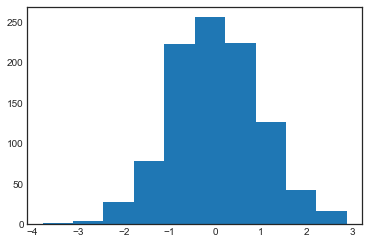

In [3]:
plt.hist(data);

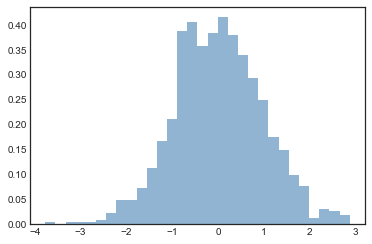

In [6]:
# customized:
plt.hist(data, bins=30, density=True, alpha=0.6,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

C:\anaconda\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


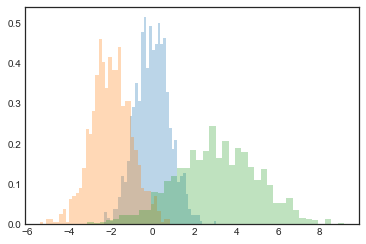

In [7]:
# Useful experience: 
# the combination of histtype='stepfilled' 
#  along with some transparency alpha  
#  when comparing histograms of several distributions:

x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [8]:
# simply compute the histogram without display
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[  6 105 479 351  59]


In [ ]:
# Two-Dimensional Histograms and Binnings

In [9]:
# define: an x and y array drawn from 
#  a multivariate Gaussian distribution:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

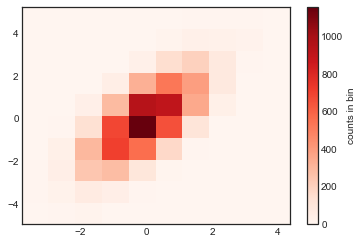

In [16]:
# square binning
plt.hist2d(x, y, bins=10, cmap='Reds')
cb = plt.colorbar()
cb.set_label('counts in bin')

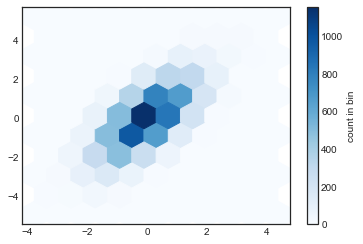

In [15]:
# hexagon binning
plt.hexbin(x, y, gridsize=10, cmap='Blues')
cb = plt.colorbar(label='count in bin')

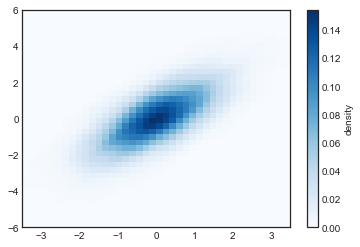

In [17]:
# Kernel density estimation (KDE)

from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

In [ ]:
# Three-Dimensional Plotting in Matplotlib

In [18]:
from mpl_toolkits import mplot3d

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

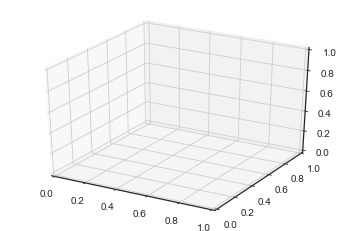

In [20]:
# the keyword projection='3d' creates a 3-D plot:
fig = plt.figure()
ax = plt.axes(projection='3d')

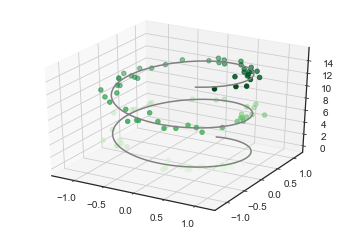

In [21]:
# Three-dimensional Points and Lines
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [22]:
# Three-dimensional Contour Plots
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

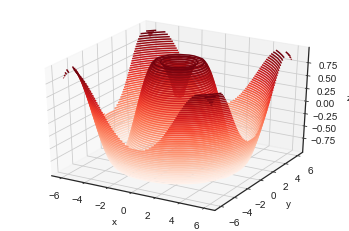

In [29]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 60, cmap='Reds')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

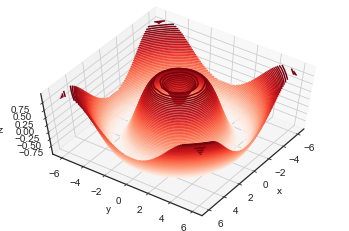

In [35]:
# an elevation of 60 degrees 
#   (that is, 60 degrees above the x-y plane) 
# an azimuth of 35 degrees 
#   (that is, rotated 35 degrees counter-clockwise about the z-axis)
ax.view_init(60, 35)
fig

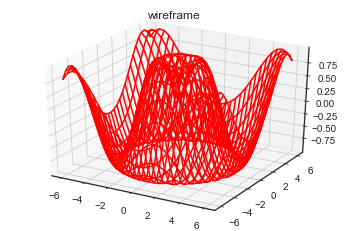

In [38]:
# wireframes
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='red')
ax.set_title('wireframe');

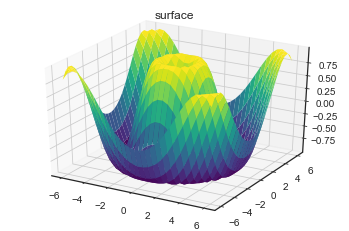

In [39]:
# surface plot with adding a colormap
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

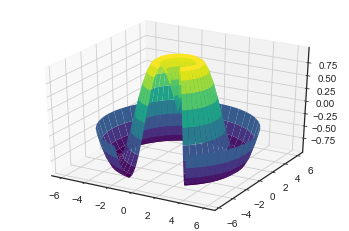

In [40]:
# slicing
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

In [ ]:
# Surface Triangulations

In [41]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

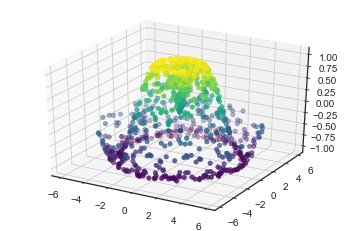

In [42]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

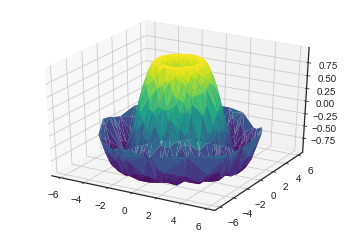

In [43]:
#
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

In [44]:
ax.plot_trisurf?

Signature:
ax.plot_trisurf(
    ['*args', 'color=None', 'norm=None', 'vmin=None', 'vmax=None', 'lightsource=None', '**kwargs'],
)
Docstring:
============= ================================================
Argument      Description
============= ================================================
*X*, *Y*, *Z* Data values as 1D arrays
*color*       Color of the surface patches
*cmap*        A colormap for the surface patches.
*norm*        An instance of Normalize to map values to colors
*vmin*        Minimum value to map
*vmax*        Maximum value to map
*shade*       Whether to shade the facecolors
============= ================================================

The (optional) triangulation can be specified in one of two ways;
either::

  plot_trisurf(triangulation, ...)

where triangulation is a :class:`~matplotlib.tri.Triangulation`
object, or::

  plot_trisurf(X, Y, ...)
  plot_trisurf(X, Y, triangles, ...)
  plot_trisurf(X, Y, triangles=triangles, ...)

in which case a Triangulation o

In [ ]:
# Example: Visualizing a Möbius strip

In [45]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

In [46]:
phi = 0.5 * theta

In [47]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

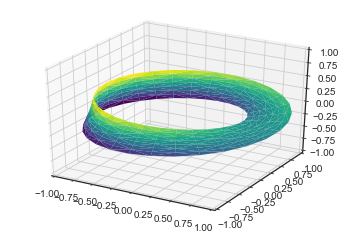

In [48]:
#  triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);